In [1]:
try:
    from lerobot.datasets.lerobot_dataset import LeRobotDataset
    _LEROBOT_VERSION = '2.1'
except:
    from lerobot.common.datasets.lerobot_dataset import LeRobotDataset
    _LEROBOT_VERSION = '2.0'

repo_id = 'Koorye/pika-demo'
# repo_id = 'Koorye/pika-tiny'

if _LEROBOT_VERSION == '2.1':
    dataset = LeRobotDataset(repo_id=repo_id, video_backend='pyav')
else:
    dataset = LeRobotDataset(repo_id=repo_id, local_files_only=True)

iterator = iter(dataset)

/home/shihanwu/miniconda3/envs/pi0-for-pika/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


dict_keys(['third_base_rgb', 'left_wrist_base_rgb', 'left_wrist_fisheye_rgb', 'right_wrist_base_rgb', 'right_wrist_fisheye_rgb', 'states', 'actions', 'third_base_depth', 'left_wrist_base_depth', 'right_wrist_base_depth', 'timestamp', 'frame_index', 'episode_index', 'index', 'task_index', 'task'])
tensor(0)
tensor(0)
tensor([-0.0370,  0.0505, -0.1803,  0.0195,  0.8931,  1.6720,  1.6900,  0.7116,
         0.1958, -0.1770, -0.0139,  0.8949,  1.6391,  1.6800])
torch.Size([3, 480, 640])


/home/shihanwu/miniconda3/envs/pi0-for-pika/lib/python3.11/site-packages/torchvision/io/_video_deprecation_warning.py:5: UserWarning: The video decoding and encoding capabilities of torchvision are deprecated from version 0.22 and will be removed in version 0.24. We recommend that you migrate to TorchCodec, where we'll consolidate the future decoding/encoding capabilities of PyTorch: https://github.com/pytorch/torchcodec
  warnings.warn(


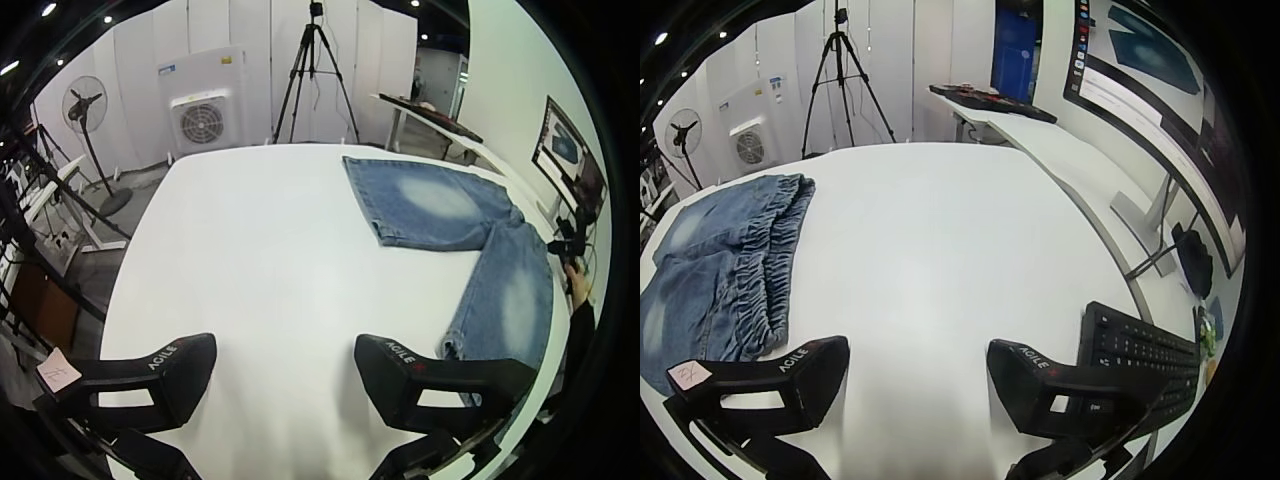

In [264]:
import cv2
import numpy as np
from PIL import Image


def get_next_sample(iterator, k):
    sample = next(iterator)
    for _ in range(k - 1):
        sample = next(iterator)
    return sample

iterator = iter(dataset)
sample = get_next_sample(iterator, 1)

print(sample.keys())
print(sample['episode_index'])
print(sample['frame_index'])
print(sample['actions'])
print(sample['left_wrist_fisheye_rgb'].shape)
Image.fromarray(cv2.hconcat([
    np.uint8(sample['left_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255), 
    np.uint8(sample['right_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
]))

In [19]:
from tqdm import tqdm

iterator = iter(dataset)

left_xmin, left_xmax = 1e8, -1e8
left_ymin, left_ymax = 1e8, -1e8
left_zmin, left_zmax = 1e8, -1e8
right_xmin, right_xmax = 1e8, -1e8
right_ymin, right_ymax = 1e8, -1e8
right_zmin, right_zmax = 1e8, -1e8
left_xmin_sample, left_xmax_sample = None, None
left_ymin_sample, left_ymax_sample = None, None
left_zmin_sample, left_zmax_sample = None, None
right_xmin_sample, right_xmax_sample = None, None
right_ymin_sample, right_ymax_sample = None, None
right_zmin_sample, right_zmax_sample = None, None

for i in tqdm(range(300)):
    sample = next(iterator)
    if sample['actions'][3] < left_xmin:
        left_xmin = sample['actions'][3]
        left_xmin_sample = sample
    if sample['actions'][3] > left_xmax:
        left_xmax = sample['actions'][3]
        left_xmax_sample = sample
    if sample['actions'][4] < left_ymin:
        left_ymin = sample['actions'][4]
        left_ymin_sample = sample
    if sample['actions'][4] > left_ymax:
        left_ymax = sample['actions'][4]
        left_ymax_sample = sample
    if sample['actions'][5] < left_zmin:
        left_zmin = sample['actions'][5]
        left_zmin_sample = sample
    if sample['actions'][5] > left_zmax:
        left_zmax = sample['actions'][5]
        left_zmax_sample = sample
    if sample['actions'][10] < right_xmin:
        right_xmin = sample['actions'][10]
        right_xmin_sample = sample
    if sample['actions'][10] > right_xmax:
        right_xmax = sample['actions'][10]
        right_xmax_sample = sample
    if sample['actions'][11] < right_ymin:
        right_ymin = sample['actions'][11]
        right_ymin_sample = sample
    if sample['actions'][11] > right_ymax:
        right_ymax = sample['actions'][11]
        right_ymax_sample = sample
    if sample['actions'][12] < right_zmin:
        right_zmin = sample['actions'][12]
        right_zmin_sample = sample
    if sample['actions'][12] > right_zmax:
        right_zmax = sample['actions'][12]
        right_zmax_sample = sample

100%|██████████| 300/300 [00:26<00:00, 11.51it/s]


Left xmin: -0.3861178755760193, xmax: 0.2060430347919464, ymin: 0.6091545820236206, ymax: 0.9866033792495728, zmin: 0.5140209197998047, zmax: 1.6720552444458008


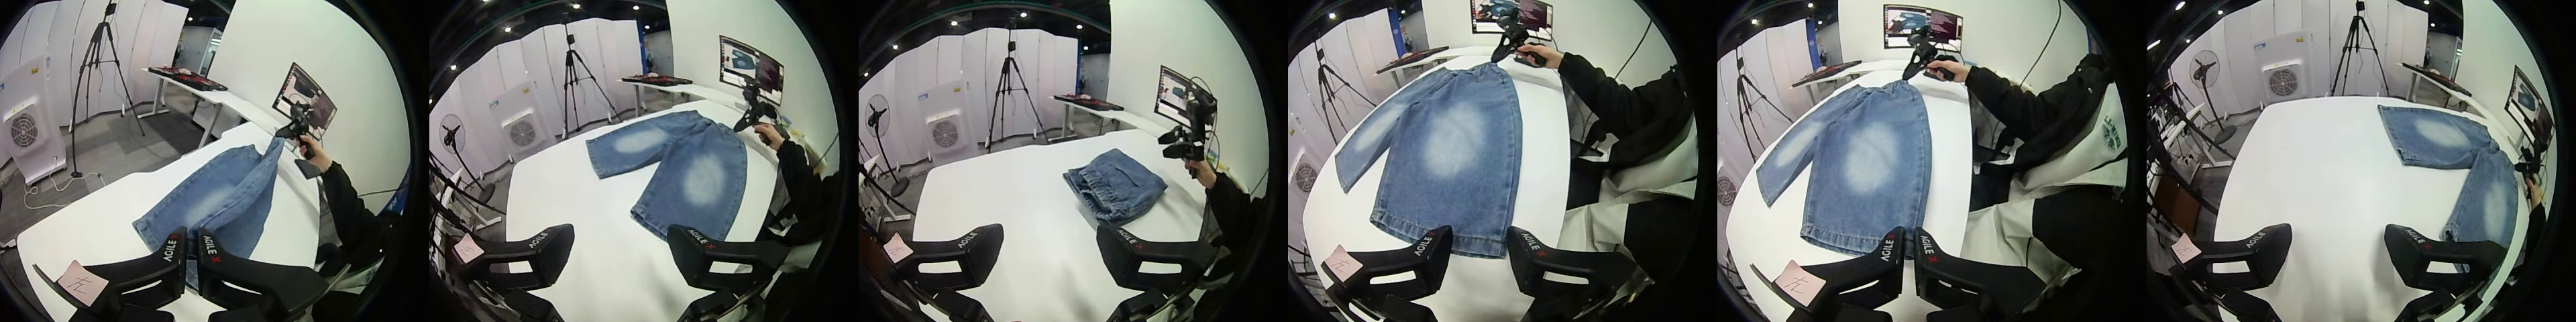

In [20]:
print(f'Left xmin: {left_xmin}, xmax: {left_xmax}, ymin: {left_ymin}, ymax: {left_ymax}, zmin: {left_zmin}, zmax: {left_zmax}')
Image.fromarray(cv2.hconcat([
    np.uint8(left_xmin_sample['left_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255), 
    np.uint8(left_xmax_sample['left_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
    np.uint8(left_ymin_sample['left_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
    np.uint8(left_ymax_sample['left_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
    np.uint8(left_zmin_sample['left_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255), 
    np.uint8(left_zmax_sample['left_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
]))

Right xmin: -0.11083261668682098, xmax: 1.2279517650604248, ymin: 0.5681357979774475, ymax: 1.021193504333496, zmin: 1.6277908086776733, zmax: 3.1234588623046875


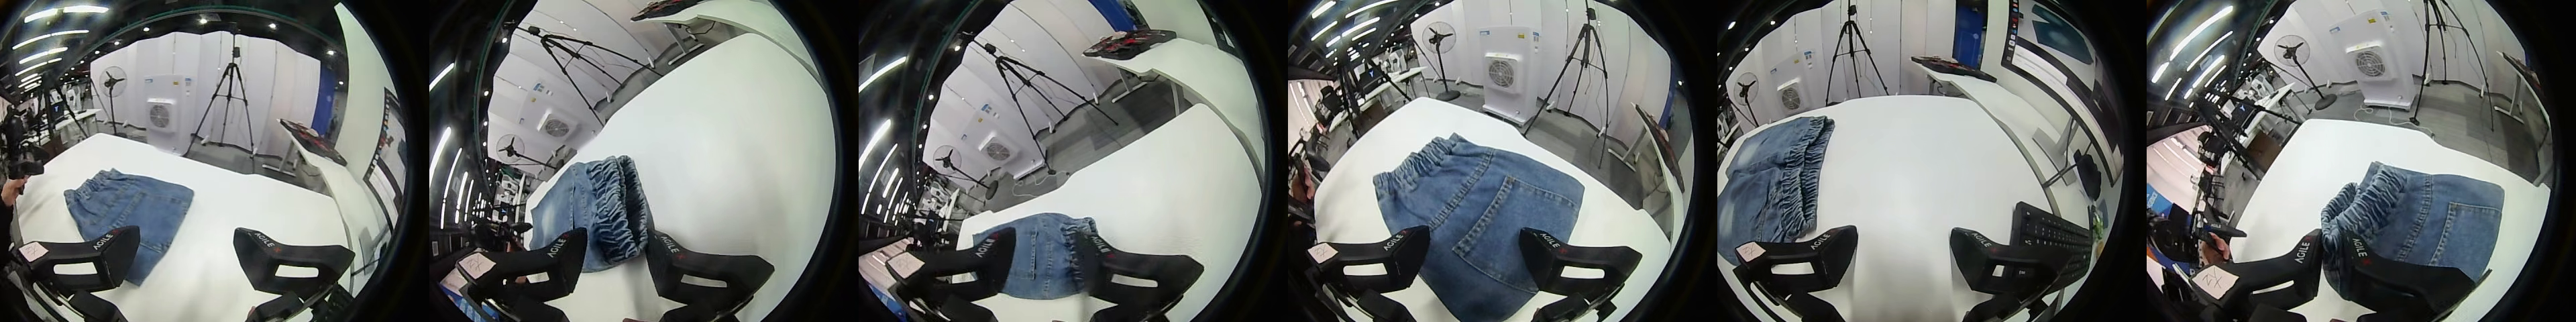

In [21]:
print(f'Right xmin: {right_xmin}, xmax: {right_xmax}, ymin: {right_ymin}, ymax: {right_ymax}, zmin: {right_zmin}, zmax: {right_zmax}')
Image.fromarray(cv2.hconcat([
    np.uint8(right_xmin_sample['right_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255), 
    np.uint8(right_xmax_sample['right_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
    np.uint8(right_ymin_sample['right_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
    np.uint8(right_ymax_sample['right_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
    np.uint8(right_zmin_sample['right_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255), 
    np.uint8(right_zmax_sample['right_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
]))

真机 X顺时针，Y顺时针，Z顺时针

In [ ]:
import math
import numpy as np


def euler_to_rotation_matrix(rx, ry, rz):
    """Convert Euler angles (in radians) to rotation matrix (XYZ order)"""
    # XYZ order: first rx (roll), then ry (pitch), then rz (yaw)
    cx, sx = math.cos(rx), math.sin(rx)
    cy, sy = math.cos(ry), math.sin(ry)
    cz, sz = math.cos(rz), math.sin(rz)
    
    # Rotation matrix for XYZ order
    R = np.array([
        [cy*cz, sx*sy*cz - cx*sz, cx*sy*cz + sx*sz],
        [cy*sz, sx*sy*sz + cx*cz, cx*sy*sz - sx*cz],
        [-sy,   sx*cy,            cx*cy]
    ])
    return R


def rotation_matrix_to_euler(R):
    """Convert rotation matrix to Euler angles (XYZ order)"""
    sy = math.sqrt(R[0, 0]**2 + R[1, 0]**2)
    singular = sy < 1e-6
    
    if not singular:
        rx = math.atan2(R[2, 1], R[2, 2])
        ry = math.atan2(-R[2, 0], sy)
        rz = math.atan2(R[1, 0], R[0, 0])
    else:
        rx = math.atan2(-R[1, 2], R[1, 1])
        ry = math.atan2(-R[2, 0], sy)
        rz = 0
    
    return np.array([rx, ry, rz])


def delta_euler(euler1, euler2):
    R1 = euler_to_rotation_matrix(euler1[0], euler1[1], euler1[2])
    R2 = euler_to_rotation_matrix(euler2[0], euler2[1], euler2[2])
    R_delta = np.dot(R2, R1.T)
    delta_euler_angles = rotation_matrix_to_euler(R_delta)
    return delta_euler_angles


iterator = iter(dataset)
past_sample = next(iterator)
current_episode = past_sample['episode_index'].item()

delta_actions_list = []

tqdm = tqdm(total=300, desc='Processing samples')

while True:
    sample = get_next_sample(iterator, 1)
    if sample['frame_index'].item() > 300:
        break
    
    delta_pos_left = sample['actions'][:3] - past_sample['actions'][:3]
    delta_euler_left = delta_euler(past_sample['actions'][3:6], sample['actions'][3:6])
    delta_action_left = np.array([sample['actions'][6]])

    delta_pos_right = sample['actions'][7:10] - past_sample['actions'][7:10]
    delta_euler_right = delta_euler(past_sample['actions'][10:13], sample['actions'][10:13])
    delta_action_right = np.array([sample['actions'][13]])

    delta_actions = np.concatenate([
        delta_pos_left, delta_euler_left, delta_action_left,
        delta_pos_right, delta_euler_right, delta_action_right
    ]).astype(np.float32)
    delta_actions_list.append(delta_actions)
    past_sample = sample
    tqdm.update(1)

delta_actions_list = np.stack(delta_actions_list)
print(delta_actions_list.shape)
np.save('../examples/example_actions.npy', delta_actions_list)

(300, 14)


In [352]:
import numpy as np

delta_actions_list = np.load('../examples/example_actions.npy')
print(delta_actions_list.shape)

(60, 14)


In [251]:
import math
import numpy as np

def euler_to_rotation_matrix(rx, ry, rz):
    """Convert Euler angles (in radians) to rotation matrix (XYZ order)"""
    # XYZ order: first rx (roll), then ry (pitch), then rz (yaw)
    cx, sx = math.cos(rx), math.sin(rx)
    cy, sy = math.cos(ry), math.sin(ry)
    cz, sz = math.cos(rz), math.sin(rz)
    
    # Rotation matrix for XYZ order
    R = np.array([
        [cy*cz, sx*sy*cz - cx*sz, cx*sy*cz + sx*sz],
        [cy*sz, sx*sy*sz + cx*cz, cx*sy*sz - sx*cz],
        [-sy,   sx*cy,            cx*cy]
    ])
    return R


def rotation_matrix_to_euler(R):
    """Convert rotation matrix to Euler angles (XYZ order)"""
    sy = math.sqrt(R[0, 0]**2 + R[1, 0]**2)
    singular = sy < 1e-6
    
    if not singular:
        rx = math.atan2(R[2, 1], R[2, 2])
        ry = math.atan2(-R[2, 0], sy)
        rz = math.atan2(R[1, 0], R[0, 0])
    else:
        rx = math.atan2(-R[1, 2], R[1, 1])
        ry = math.atan2(-R[2, 0], sy)
        rz = 0
    
    return np.array([rx, ry, rz])


def delta_to_absolute_gripper_translation(state_pos, state_rot, delta_pos, delta_rot):
    """
    Transform delta to absolute gripper translation,
    delta is in gripper frame and state is in world frame.
    
    Params:
    - delta: [x, y, z, rx, ry, rz] in gripper frame (x=forward, z=up)
             rx, ry, rz in 1 radian increments
    - state: [x, y, z, rx, ry, rz] in world frame (x=forward, z=up)
             rx, ry, rz in 1 radian increments
    Returns:
    - Absolute position and orientation in world frame [x, y, z, rx, ry, rz]
    """
    state_rot_matrix = euler_to_rotation_matrix(*state_rot)
    delta_rot_matrix = euler_to_rotation_matrix(*delta_rot)
    absolute_rot_matrix = state_rot_matrix @ delta_rot_matrix
    absolute_rot = rotation_matrix_to_euler(absolute_rot_matrix)

    absolute_pos = state_pos + state_rot_matrix.T @ delta_pos
    return absolute_pos, absolute_rot

虚拟：X顺时针，Y顺时针，Z顺时针

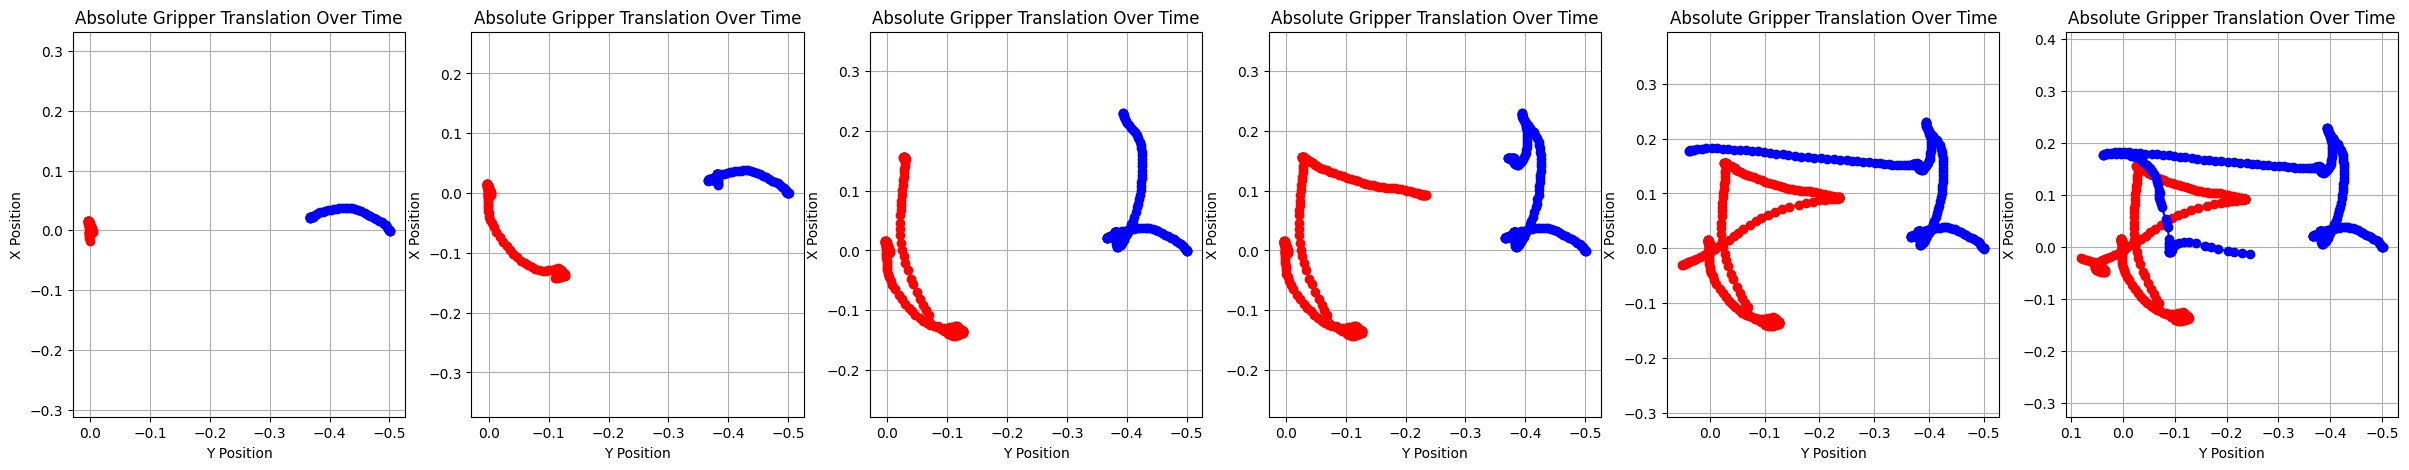

In [284]:
import numpy as np
import matplotlib.pyplot as plt

# left_pos, left_rot = np.array([0, 0, 0]),      np.array([+0.0195, -0.8931, +1.6720])
# right_pos, right_rot = np.array([0, -0.5, 0]), np.array([-0.0139, -0.8949, +1.6391])

left_pos, left_rot = np.array([0, 0, 0]), np.array([0, -0.2 * np.pi, 0.8 * np.pi])
right_pos, right_rot = np.array([0, -0.5, 0]), np.array([0, -0.2 * np.pi, 0.5 * np.pi])

left_states_list = [np.concatenate([left_pos, left_rot, [1.6]])]
right_states_list = [np.concatenate([right_pos, right_rot, [1.6]])]

for action in delta_actions_list[:300]:
    action = action.copy()
    left_pos_delta, left_rot_delta, left_grip = action[:3], action[3:6], action[6]
    right_pos_delta, right_rot_delta, right_grip = action[7:10], action[10:13], action[13]
    
    left_pos, left_rot = delta_to_absolute_gripper_translation(left_pos, left_rot, left_pos_delta, left_rot_delta)
    right_pos, right_rot = delta_to_absolute_gripper_translation(right_pos, right_rot, right_pos_delta, right_rot_delta)

    left_states = np.concatenate([left_pos, left_rot, [left_grip]])
    right_states = np.concatenate([right_pos, right_rot, [right_grip]])
    left_states_list.append(left_states.copy())
    right_states_list.append(right_states.copy())

left_states_list = np.array(left_states_list)
right_states_list = np.array(right_states_list)

plt.close()
plt.figure(figsize=(30, 5))

# 2d x y
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.plot(left_states_list[:50 * (i + 1), 1], left_states_list[:50 * (i + 1), 0], marker='o', linestyle='-', color='r')
    plt.plot(right_states_list[:50 * (i + 1), 1], right_states_list[:50 * (i + 1), 0], marker='o', linestyle='-', color='b')
    plt.title('Absolute Gripper Translation Over Time')
    plt.xlabel('Y Position')
    plt.ylabel('X Position')
    plt.axis('equal')
    plt.gca().invert_xaxis()
    plt.grid()


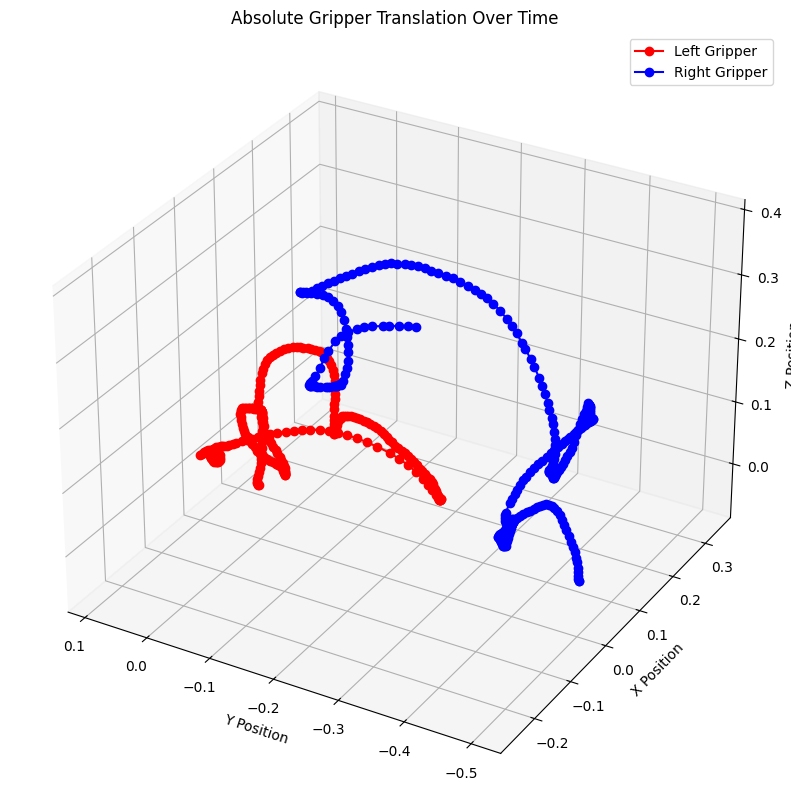

In [272]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot3D(left_states_list[:, 1], left_states_list[:, 0], left_states_list[:, 2], marker='o', linestyle='-', color='r', label='Left Gripper')
ax.plot3D(right_states_list[:, 1], right_states_list[:, 0], right_states_list[:, 2], marker='o', linestyle='-', color='b', label='Right Gripper')
ax.set_title('Absolute Gripper Translation Over Time')
ax.set_xlabel('Y Position')
ax.set_ylabel('X Position')
ax.set_zlabel('Z Position')
ax.legend()
plt.axis('equal')
plt.gca().invert_xaxis()
plt.grid()
plt.show()

In [343]:
def absolute_state_pika_to_piper(state):
    """
    Convert absolute state from Pika format to Piper format.
    Params:
    - state: [x, y, z, rx, ry, rz, grip] in Pika format
    Returns:
    - [x, y, z, rx, ry, rz, grip] in Piper format
    """
    pos, rot, grip = state[:3], state[3:6], state[6]
    pos = pos * 1e6
    grip = int(grip * 60000 / 1.6)

    print(rot)
    rot_matrix = euler_to_rotation_matrix(rot[0], rot[1], rot[2])
    align_matrix = np.array([
        [0, -1, 0],
        [0, 0, -1],
        [1, 0, 0]
    ])
    rot_matrix = rot_matrix @ align_matrix
    rot = rotation_matrix_to_euler(rot_matrix)
    rot = rot * 180 / np.pi  * 1000
    print(rot)
    
    return np.concatenate([pos, rot, [grip]]).astype(int)

absolute_state_pika_to_piper(left_states_list[0]), absolute_state_pika_to_piper(left_states_list[-1])

[ 0.         -0.62831853  2.51327412]
[-90000. -54000. -36000.]
[ 0.04400988 -0.56043564  2.31601944]
[-94010.23409107 -57801.10768257 -42565.8332801 ]


(array([     0,      0,      0, -90000, -54000, -36000,  60000]),
 array([-20486,  84722,  32795, -94010, -57801, -42565,  63375]))

In [351]:
rot = np.array([0, -0.2 * np.pi, 0.5 * np.pi])
# rot = np.array([0, 0, 0.5 * np.pi])

print(rad_to_deg(rot))
rot_matrix = euler_to_rotation_matrix(rot[0], rot[1], rot[2])

align_euler = deg_to_rad(np.array([-90, 0, -90]))
align_matrix = euler_to_rotation_matrix(align_euler[0], align_euler[1], align_euler[2])
print(align_matrix)

rot_matrix = align_matrix @ rot_matrix
print(rad_to_deg(rotation_matrix_to_euler(rot_matrix)))

# rot = rotation_matrix_to_euler(rot_matrix)
# print(rad_to_deg(rot).astype(int))

[  0 -36  90]
[[ 6.12323400e-17  6.12323400e-17  1.00000000e+00]
 [-1.00000000e+00  3.74939946e-33  6.12323400e-17]
 [-0.00000000e+00 -1.00000000e+00  6.12323400e-17]]
[ 0 54  0]


In [344]:
rot1 = deg_to_rad(np.array([0, 0, 90]))
rot2 = deg_to_rad(np.array([0, 90, 0]))

rot1_matrix = euler_to_rotation_matrix(rot1[0], rot1[1], rot1[2])
rot2_matrix = euler_to_rotation_matrix(rot2[0], rot2[1], rot2[2])
rot_delta_matrix = rot2_matrix @ rot1_matrix.T
rot_delta = rotation_matrix_to_euler(rot_delta_matrix)
print(rad_to_deg(rot_delta).astype(int))

[-90   0 -90]
